In [28]:
%pip install pandas matplotlib seaborn sentence-transformers
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\timytapilla\appdata\local\programs\python\python312\lib\site-packages (2.0.1)




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import numpy as np
from openai import OpenAI
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
import umap

ModuleNotFoundError: No module named 'openai'

In [55]:
# Especifica la ruta del archivo .csv
file_path = 'faq_with_urls.csv'

# Lee el archivo .csv y carga los datos en un DataFrame
df = pd.read_csv(file_path)

# Muestra las primeras filas del DataFrame para verificar que se ha cargado correctamente
df.head()

,url,question,answer
0,https://www.familysearch.org/en/help/helpcente...,What does tagging a source do in Source Linker?,Tagging a source turns it into a reference for...
1,https://www.familysearch.org/en/help/helpcente...,What categories can you tag a source to?,"Name, Birth, Death, Sex, Christening, Burial, ..."
2,https://www.familysearch.org/en/help/helpcente...,How do you tag a source to a detail?,Click the checkbox next to the detail.
3,https://www.familysearch.org/en/help/helpcente...,How can you remove a source from a detail?,Uncheck the checkbox next to the detail.
4,https://www.familysearch.org/en/help/helpcente...,What does the left column in Source Linker dis...,Details from the historical record.


In [56]:
df.isnull().sum()

url         0
question    0
answer      0
dtype: int64

In [57]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [url, question, answer]
Index: []


In [58]:
df.describe(include='all')

,url,question,answer
count,1656,1656,1656
unique,23,71,72
top,https://www.familysearch.org/en/help/helpcente...,What are record hints in Family Tree?,Tagging a source turns it into a reference for...
freq,72,46,23


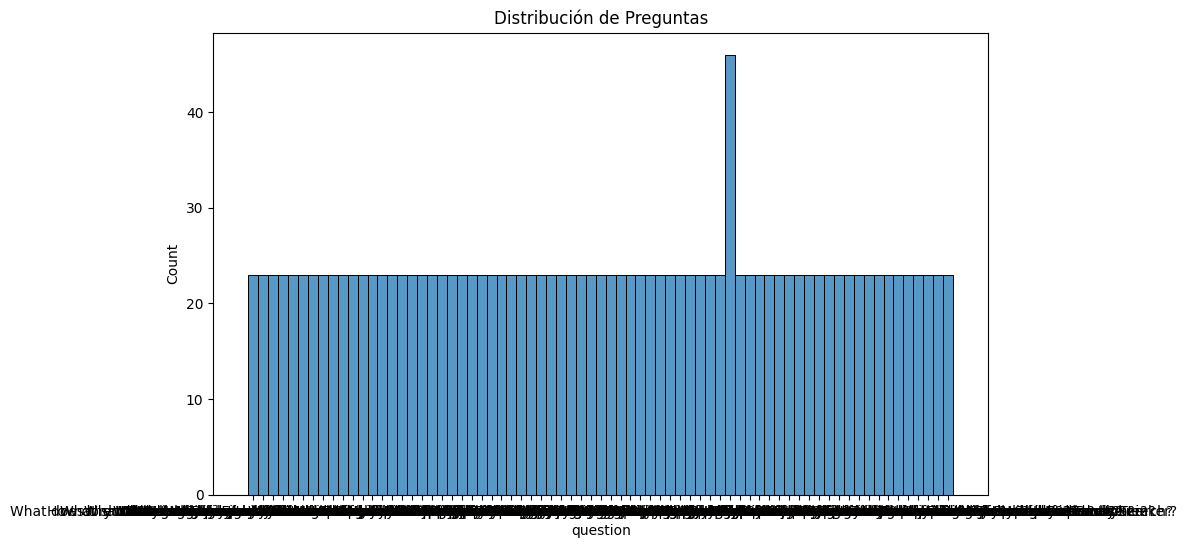

In [59]:
# Visualizar la distribución de preguntas (si la columna 'question' no está vacía)
if not df['question'].empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['question'].dropna(), bins=30)
    plt.title('Distribución de Preguntas')
    plt.show()

In [60]:
# count the number of words in the question
df['word_count'] = df['question'].apply(lambda q: len(str(q).split()))
df.head()

,url,question,answer,word_count
0,https://www.familysearch.org/en/help/helpcente...,What does tagging a source do in Source Linker?,Tagging a source turns it into a reference for...,9
1,https://www.familysearch.org/en/help/helpcente...,What categories can you tag a source to?,"Name, Birth, Death, Sex, Christening, Burial, ...",8
2,https://www.familysearch.org/en/help/helpcente...,How do you tag a source to a detail?,Click the checkbox next to the detail.,9
3,https://www.familysearch.org/en/help/helpcente...,How can you remove a source from a detail?,Uncheck the checkbox next to the detail.,9
4,https://www.familysearch.org/en/help/helpcente...,What does the left column in Source Linker dis...,Details from the historical record.,9


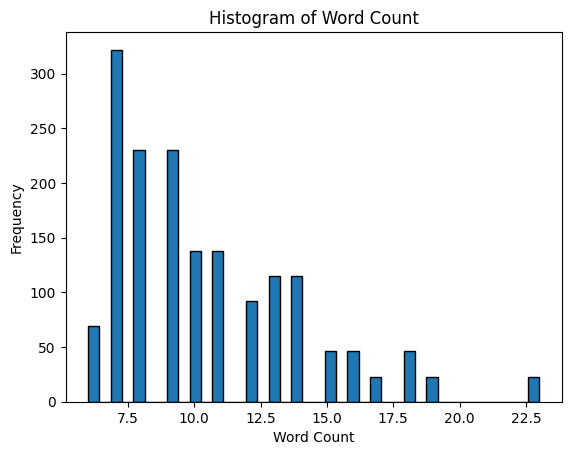

In [61]:
# plot the word counts
df['word_count'].plot(kind='hist', bins=40, edgecolor='black')
# Adding labels and title
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')
# Show the plot
plt.show()

In [62]:
short_df = df[df['word_count'] < 3]
print(len(short_df))
print(short_df)

0
Empty DataFrame
Columns: [url, question, answer, word_count]
Index: []


In [63]:
# review long questions
long_df = df[df['word_count'] >= 23]
for q, count in zip(long_df['question'], long_df['word_count']):
    print(count)
    print(q)
    print()

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right column?

23
What should you do if names in the left column of Source Linker are not aligned correctly with names in the right c

In [67]:
df.head()

,url,question,answer,word_count
0,https://www.familysearch.org/en/help/helpcente...,What does tagging a source do in Source Linker?,Tagging a source turns it into a reference for...,9
1,https://www.familysearch.org/en/help/helpcente...,What categories can you tag a source to?,"Name, Birth, Death, Sex, Christening, Burial, ...",8
2,https://www.familysearch.org/en/help/helpcente...,How do you tag a source to a detail?,Click the checkbox next to the detail.,9
3,https://www.familysearch.org/en/help/helpcente...,How can you remove a source from a detail?,Uncheck the checkbox next to the detail.,9
4,https://www.familysearch.org/en/help/helpcente...,What does the left column in Source Linker dis...,Details from the historical record.,9


NameError: name 'OpenAI' is not defined

In [26]:
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar los datos textuales (en este caso, las preguntas)
X = vectorizer.fit_transform(df['question'].dropna())

# Convertir a DataFrame para ver las características
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

   about  action  add  adding  after  aligned  all   an  ancestor  ancestors  \
0    0.0     0.0  0.0     0.0    0.0      0.0  0.0  0.0       0.0        0.0   
1    0.0     0.0  0.0     0.0    0.0      0.0  0.0  0.0       0.0        0.0   
2    0.0     0.0  0.0     0.0    0.0      0.0  0.0  0.0       0.0        0.0   
3    0.0     0.0  0.0     0.0    0.0      0.0  0.0  0.0       0.0        0.0   
4    0.0     0.0  0.0     0.0    0.0      0.0  0.0  0.0       0.0        0.0   

   ...  want  was      what  when  why  with  worded  yellow       you  your  
0  ...   0.0  0.0  0.175532   0.0  0.0   0.0     0.0     0.0  0.000000   0.0  
1  ...   0.0  0.0  0.168452   0.0  0.0   0.0     0.0     0.0  0.212442   0.0  
2  ...   0.0  0.0  0.000000   0.0  0.0   0.0     0.0     0.0  0.228723   0.0  
3  ...   0.0  0.0  0.000000   0.0  0.0   0.0     0.0     0.0  0.197407   0.0  
4  ...   0.0  0.0  0.160365   0.0  0.0   0.0     0.0     0.0  0.000000   0.0  

[5 rows x 191 columns]


In [30]:
# Cargar el modelo preentrenado
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generar embeddings para las preguntas
questions = df['question'].dropna().tolist()
embeddings = model.encode(questions)

# Convertir a DataFrame para ver los embeddings
embeddings_df = pd.DataFrame(embeddings)
print(embeddings_df.head())

RuntimeError: Numpy is not available